## **⭐Understanding The Data⭐**

In [449]:
import pandas as pd
agri= pd.read_csv("agriculture_ml_data.csv")
agri.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [450]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [451]:
agri.describe()

,N,P,K,temperature,humidity,ph,rainfall,crop
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,11.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,6.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,11.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,22.000000


In [452]:
import pandas as pd

marigold_calculation = agri[agri['crop'] == '6']
a=agri.mean()
print(a)

b=agri.median()
print(b)


N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
crop            11.500000
dtype: float64
N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
crop           11.500000
dtype: float64


In [453]:
x=agri.mean()
print(x)

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
crop            11.500000
dtype: float64


In [454]:
y=agri.median()
print(y)

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
crop           11.500000
dtype: float64


In [455]:
agri.crop.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

## ⭐Visualisation⭐

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'crop'}>, <AxesSubplot:>]],
      dtype=object)

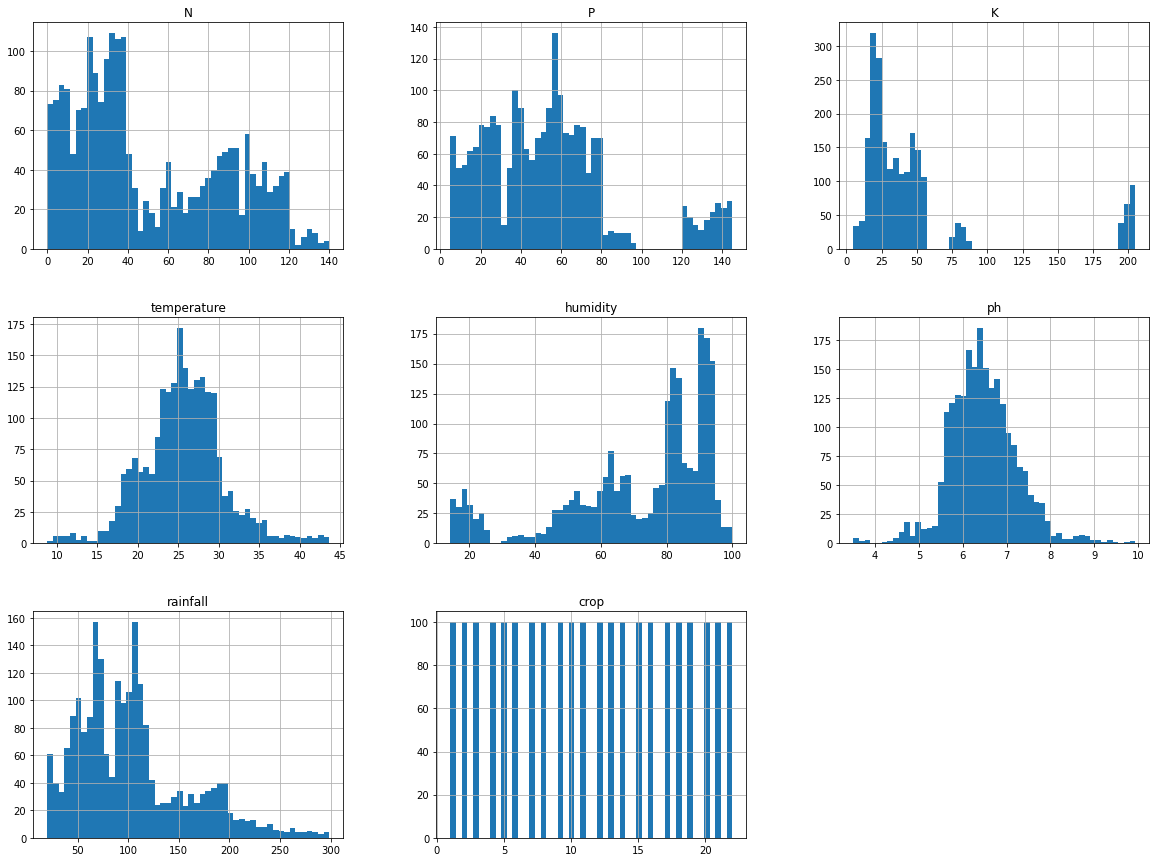

In [456]:
%matplotlib inline

# For plotting histogram 
import matplotlib.pyplot as plt
agri.hist(bins=50, figsize=(20, 15))

## **⭐Data Splitting⭐**

In [457]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(agri, agri['crop']):
    strat_train_set = agri.loc[train_index]
    strat_test_set = agri.loc[test_index]


print(f"Rows in train set: {len(strat_train_set)}\nRows in test set: {len(strat_test_set)}\n")

Rows in train set: 1760
Rows in test set: 440



In [458]:
strat_train_set

,N,P,K,temperature,humidity,ph,rainfall,crop
1607,0,18,14,29.771494,92.007200,7.207991,114.416179,17
712,52,63,19,29.589490,68.321768,6.928899,67.530212,8
962,24,21,42,20.822107,87.228157,6.999014,109.442993,10
1366,120,7,47,24.247825,83.036879,6.653868,54.765762,14
1671,18,12,8,12.590940,91.816688,6.206053,119.391672,17
...,...,...,...,...,...,...,...,...
1008,108,88,55,26.288460,83.390039,5.891458,113.872980,11
1822,1,8,26,27.513630,94.189558,5.562912,156.673255,19
852,12,58,23,21.746001,63.395032,6.765091,50.433061,9
883,14,76,20,29.059412,62.106524,7.042475,36.501137,9


In [459]:
strat_train_set.describe()

,N,P,K,temperature,humidity,ph,rainfall,crop
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,50.443182,53.423295,48.136932,25.675126,71.508150,6.473164,103.444435,11.500000
std,36.891358,33.006482,50.635024,5.139386,22.238373,0.770365,54.963889,6.346092
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.510404,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.782091,60.176664,5.965508,64.777564,6.000000
50%,37.000000,51.000000,32.000000,25.626714,80.437812,6.421510,94.986242,11.500000
75%,84.000000,68.000000,48.250000,28.578222,89.908373,6.929604,123.026982,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.926212,298.560117,22.000000


In [460]:
strat_test_set

,N,P,K,temperature,humidity,ph,rainfall,crop
1609,13,23,6,23.961476,90.264080,7.365338,102.695870,17
172,86,37,16,20.517168,59.212355,5.561511,67.610137,2
612,24,42,23,28.224713,82.359162,6.428054,44.012066,7
1100,2,40,27,29.737700,47.548852,5.954627,90.095869,12
1645,40,22,6,24.536101,91.909972,6.488221,115.978799,17
...,...,...,...,...,...,...,...,...
1140,2,38,33,32.386975,53.232824,4.691396,90.216332,12
87,84,50,44,25.485920,81.406335,5.935344,182.654936,1
815,40,79,17,21.126956,63.187385,6.403684,38.718345,9
754,22,55,20,33.953091,69.961000,7.423530,61.163505,8


In [461]:
strat_test_set.describe

<bound method NDFrame.describe of        N   P   K  temperature   humidity        ph    rainfall  crop
1609  13  23   6    23.961476  90.264080  7.365338  102.695870    17
172   86  37  16    20.517168  59.212355  5.561511   67.610137     2
612   24  42  23    28.224713  82.359162  6.428054   44.012066     7
1100   2  40  27    29.737700  47.548852  5.954627   90.095869    12
1645  40  22   6    24.536101  91.909972  6.488221  115.978799    17
...   ..  ..  ..          ...        ...       ...         ...   ...
1140   2  38  33    32.386975  53.232824  4.691396   90.216332    12
87    84  50  44    25.485920  81.406335  5.935344  182.654936     1
815   40  79  17    21.126956  63.187385  6.403684   38.718345     9
754   22  55  20    33.953091  69.961000  7.423530   61.163505     8
1849  34  15  34    27.058265  91.105104  5.677283  224.700695    19

[440 rows x 8 columns]>

In [462]:
strat_test_set.describe()

,N,P,K,temperature,humidity,ph,rainfall,crop
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,50.986364,53.120455,48.197727,25.380715,71.376295,6.454744,103.540537,11.500000
std,37.059944,32.939740,50.757178,4.747444,22.390365,0.788784,54.998862,6.351511
min,0.000000,5.000000,5.000000,9.724458,14.338474,3.504752,20.490356,1.000000
25%,20.000000,28.000000,20.000000,22.597668,60.455148,5.978054,63.703259,6.000000
50%,38.000000,51.000000,32.000000,25.455545,80.517727,6.426993,94.705721,11.500000
75%,88.000000,68.000000,49.000000,28.346716,90.106768,6.914286,133.304746,17.000000
max,136.000000,145.000000,205.000000,42.936054,99.846716,9.935091,285.249365,22.000000


**⭐Renaming the variables⭐**

In [463]:
# agri_train = strat_train_set.copy()
# agri_test = strat_test_set.copy()

agri_test_labels = strat_test_set["rainfall"].copy()
agri_test = strat_test_set.drop("rainfall", axis=1)


agri_train_labels = strat_train_set["rainfall"].copy()
agri_train = strat_train_set.drop("rainfall", axis=1)

## **⭐Looking for Correlations⭐**

In [464]:
def mean_squard_error(a,b):
    print("Scores:", scores)
    print("Mean error:", abs(scores.mean()))
    return(mean_squared_error(agri_test_labels, final_predictions)*10)
    # print("Standard deviation: ", scores.std())

array([[<AxesSubplot:xlabel='N', ylabel='N'>,
        <AxesSubplot:xlabel='P', ylabel='N'>,
        <AxesSubplot:xlabel='K', ylabel='N'>,
        <AxesSubplot:xlabel='temperature', ylabel='N'>,
        <AxesSubplot:xlabel='humidity', ylabel='N'>,
        <AxesSubplot:xlabel='ph', ylabel='N'>,
        <AxesSubplot:xlabel='rainfall', ylabel='N'>,
        <AxesSubplot:xlabel='crop', ylabel='N'>],
       [<AxesSubplot:xlabel='N', ylabel='P'>,
        <AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='K', ylabel='P'>,
        <AxesSubplot:xlabel='temperature', ylabel='P'>,
        <AxesSubplot:xlabel='humidity', ylabel='P'>,
        <AxesSubplot:xlabel='ph', ylabel='P'>,
        <AxesSubplot:xlabel='rainfall', ylabel='P'>,
        <AxesSubplot:xlabel='crop', ylabel='P'>],
       [<AxesSubplot:xlabel='N', ylabel='K'>,
        <AxesSubplot:xlabel='P', ylabel='K'>,
        <AxesSubplot:xlabel='K', ylabel='K'>,
        <AxesSubplot:xlabel='temperature', ylabel='K'>,
        <Axe

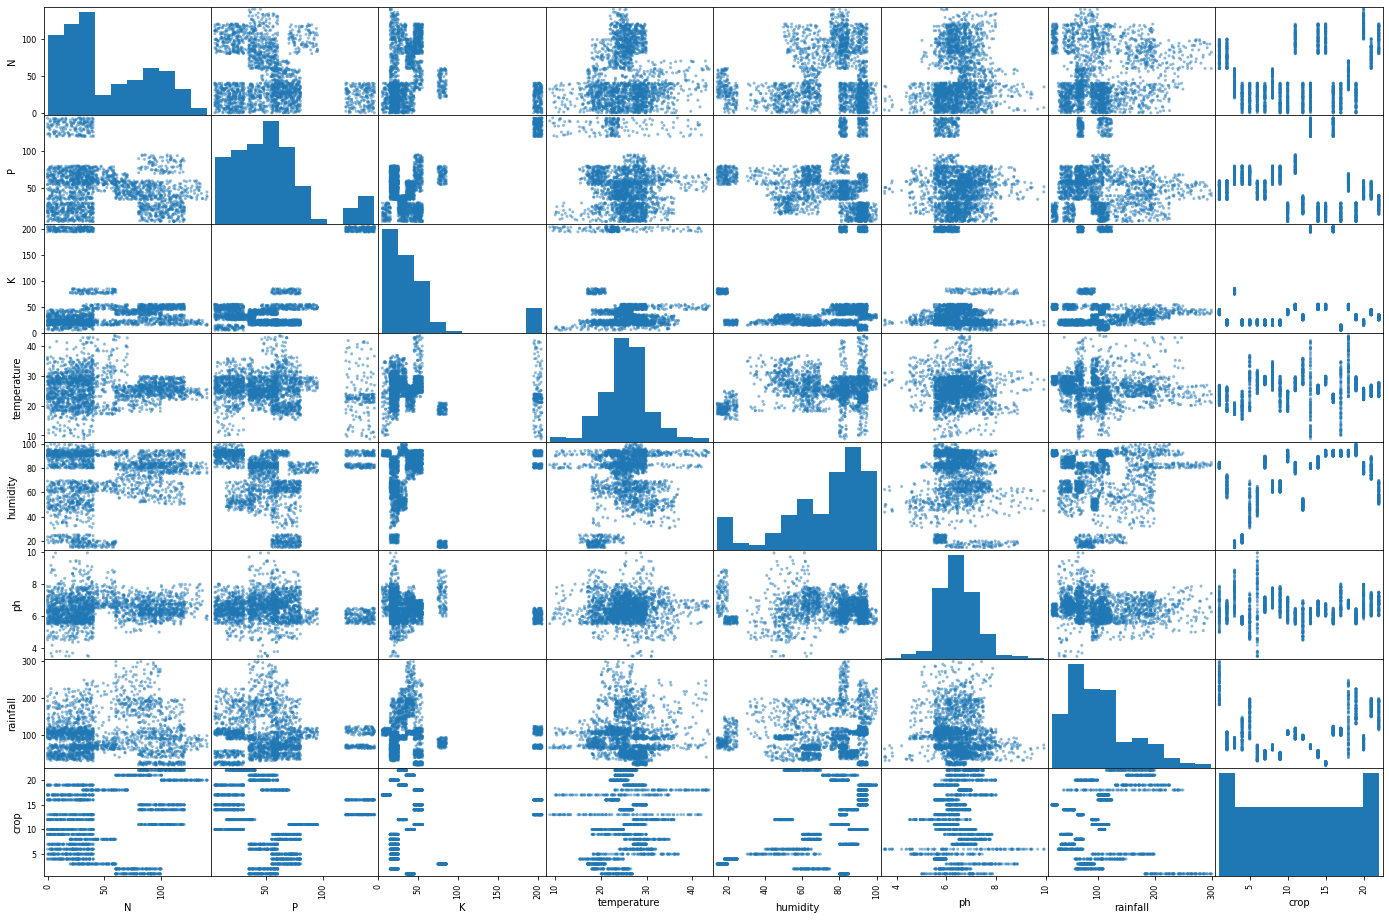

In [465]:
from pandas.plotting import scatter_matrix
attributes = ["N" ,"P" ,"K" ,"temperature" ,"humidity" ,"ph" ,"rainfall" ,"crop"]
scatter_matrix(agri[attributes], figsize = (24,16))

In [466]:
corr_matrix = agri.corr()
corr_matrix['rainfall'].sort_values(ascending=False)

rainfall       1.000000
crop           0.121486
humidity       0.094423
N              0.059020
temperature   -0.030084
K             -0.053461
P             -0.063839
ph            -0.109069
Name: rainfall, dtype: float64

In [467]:
#Looking for a better plotting function as hex plot function can only plot one plot at a time and not for all combinations like above.
# panda bhai suggested heat maps as it can show all the combinations at once

**Attribute combinations**

In [468]:
# Not implemented any attributes combinations as did not feel the need to
# yet but may try temperatures*something as it shows no strong correlation 
# whereas it should show strong positive correlation with water
# thinking of temperature*rainfall 
# as the dataset seems to surround around amount of rainfall needed for good crops( as in high temperature areas rainfall is lower) ... not sure though

**Missing Attributes**

In [469]:
# fixed missing attributes using simple imputer median method int the pipeline

## **⭐Creating a Pipeline⭐**

In [470]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [471]:
# housing_num_tr = my_pipeline.fit_transform(housing)
import numpy as np
import pandas as pd


crop_strat_train_set=strat_train_set["crop"].copy()
non_crop_strat_train_set= strat_train_set.drop("crop", axis=1)
agri_num_tr_partial = my_pipeline.fit_transform(non_crop_strat_train_set)
numpy_array_crop_strat_train_set=crop_strat_train_set.to_numpy()
agri_num_tr = np.column_stack((agri_num_tr_partial, numpy_array_crop_strat_train_set))
# agri_num_tr["crop"] = crop_strat_train_set

In [472]:
agri_num_tr.shape

(1760, 8)

## **⭐Selecting a model⭐** 

In [473]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

agri_train_labels_numpy=agri_train_labels.to_numpy()
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(agri_num_tr, agri_train_labels_numpy)

RandomForestRegressor()

In [474]:
agri_num_tr.shape

(1760, 8)

In [475]:
agri_train_labels_numpy.shape

(1760,)

In [476]:
some_data = strat_train_set.iloc[:5]

strat_train_set.describe()

,N,P,K,temperature,humidity,ph,rainfall,crop
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,50.443182,53.423295,48.136932,25.675126,71.508150,6.473164,103.444435,11.500000
std,36.891358,33.006482,50.635024,5.139386,22.238373,0.770365,54.963889,6.346092
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.510404,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.782091,60.176664,5.965508,64.777564,6.000000
50%,37.000000,51.000000,32.000000,25.626714,80.437812,6.421510,94.986242,11.500000
75%,84.000000,68.000000,48.250000,28.578222,89.908373,6.929604,123.026982,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.926212,298.560117,22.000000


In [477]:
some_labels = agri_train_labels.iloc[:5]

In [478]:
some_labels

1607    114.416179
712      67.530212
962     109.442993
1366     54.765762
1671    119.391672
Name: rainfall, dtype: float64

In [479]:
some_data

,N,P,K,temperature,humidity,ph,rainfall,crop
1607,0,18,14,29.771494,92.007200,7.207991,114.416179,17
712,52,63,19,29.589490,68.321768,6.928899,67.530212,8
962,24,21,42,20.822107,87.228157,6.999014,109.442993,10
1366,120,7,47,24.247825,83.036879,6.653868,54.765762,14
1671,18,12,8,12.590940,91.816688,6.206053,119.391672,17


In [480]:
# some_for_pipeline_data= some_data.drop("rainfall", axis=1)
some_data_of_crops= some_data["crop"].copy()
some_for_pipeline_data= some_data.drop("crop", axis=1)

prepared_data = my_pipeline.transform(some_for_pipeline_data)

some_numpy_data_of_crops=some_data_of_crops.to_numpy()
some_data_tr = np.column_stack((prepared_data, some_numpy_data_of_crops))

In [481]:
model.predict(some_data_tr)

array([114.39230078,  67.5003547 , 109.42466775,  54.78404062,
       119.40448281])

In [482]:
list(some_labels)

[114.41617859999998,
 67.53021213,
 109.4429934,
 54.76576239999999,
 119.39167179999998]

## Evaluating the model

In [483]:
from sklearn.metrics import mean_squared_error
agri_predictions = model.predict(agri_num_tr)
mse = mean_squard_error(agri_train_labels, agri_predictions)
rmse = np.sqrt(mse)

Scores: [-0.05408799 -0.06381394 -0.50415188 -0.05269652 -0.06350328 -0.09148017
 -0.04335649 -0.06142667 -0.09489333 -0.05123603]
Mean error: 0.10806463019388028


In [484]:
rmse

0.6395271273056253

## Using Cross Validation

In [485]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, agri_num_tr, agri_train_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [486]:
rmse_scores

array([0.21010608, 0.27180385, 0.73687861, 0.20137717, 0.268448  ,
       0.32134107, 0.27095498, 0.25131301, 0.35795155, 0.20073689])

In [487]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [488]:
print_scores(rmse_scores)

Scores: [0.21010608 0.27180385 0.73687861 0.20137717 0.268448   0.32134107
 0.27095498 0.25131301 0.35795155 0.20073689]
Mean:  3.0909111977834507
Standard deviation:  1.5050428213647384


## **⭐Saving the model⭐**

In [489]:
from joblib import dump, load
dump(model, 'agri_apis.joblib')

['agri_apis.joblib']

## **⭐Testing the model on test data⭐**

In [490]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# X_test = strat_test_set.drop("MEDV", axis=1)
# Y_test = strat_test_set["MEDV"].copy()

agri_test_only_crop= strat_test_set["crop"].copy()
agri_test_no_crop= strat_test_set.drop("crop", axis=1)

agri_test_prepared = my_pipeline.transform(agri_test_no_crop)

agri_test_only_crop_numpy = agri_test_only_crop.to_numpy()
agri_test_ready = np.column_stack((agri_test_prepared,agri_test_only_crop_numpy))

final_predictions = model.predict(agri_test_ready)

final_mse = mean_squard_error(agri_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse) 

# print(final_predictions, list(agri_test))
print("Final RMSE is :")
print(final_rmse)

Scores: [-0.04414457 -0.07387733 -0.54299008 -0.04055276 -0.07206433 -0.10326008
 -0.0734166  -0.06315823 -0.12812931 -0.0402953 ]
Mean error: 0.11818885926724657
Final RMSE is :
0.6204865628872728


In [491]:
final_rmse


0.6204865628872728

In [492]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean error:", scores.mean())
    # print("Standard deviation: ", scores.std())

In [493]:
print_scores(final_rmse)

Scores: 0.6204865628872728
Mean error: 0.6204865628872728


## errors here

In [494]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
]),
remainder='passthrough'


In [495]:
numeric_strat_train_set = strat_train_set.select_dtypes(exclude=['object']).columns
agri_num_tr = my_pipeline.fit_transform(numeric_strat_train_set)

AttributeError: 'tuple' object has no attribute 'fit_transform'

In [ ]:
agri_num_tr.shape

In [ ]:
non_numeric_strat_train_set=strat_train_set["crop"].copy()
numeric_strat_train_set= strat_train_set.drop("crop", axis=1)
agri_num_tr = my_pipeline.fit_transform(numeric_strat_train_set)
agri_num_tr["crop"] = non_numeric_strat_train_set

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median",numerical_only=True)),
    ('std_scaler', StandardScaler()),
])


# from sklearn.imputer import Imputer

# imputer = Imputer(numerical_only=True)
# imputer.fit_transform(data)


TypeError: __init__() got an unexpected keyword argument 'numerical_only'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Sample DataFrame with mixed data types
# data = pd.DataFrame({
#     'numeric_col1': [1, 2, 3, 4],
#     'numeric_col2': [0.1, 0.2, 0.3, 0.4],
#     'string_col': ['A', 'B', 'C', 'D']
# })

# Identify numeric columns (int64 and float64)
numeric_columns = strat_train_set.select_dtypes(exclude=['object']).columns

# Define a ColumnTransformer to apply StandardScaler only to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'  # Pass through non-numeric columns as-is
)

# Create a pipeline with the preprocessor
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add other pipeline steps (e.g., a model)
])

# Fit and transform the pipeline
X_transformed = my_pipeline.fit_transform(data)

# X_transformed now contains the scaled numeric columns and the non-numeric columns as-is


In [ ]:
numeric_columns = strat_train_set.select_dtypes(exclude=['object']).columns

In [ ]:
numeric_columns.shape()

TypeError: 'tuple' object is not callable

In [ ]:
agri_num_tr = my_pipeline.fit_transform(agri_train)

ValueError: could not convert string to float: 'orange'

In [ ]:
agri_num_tr.shape